In [2]:
import pandas as pd


def loadData():
    def toNumber(line):
        l = [float(x.strip()) for x in line]
        l[-1] = int(l[-1])
        return l
    with open('data/square.data', 'r') as fin:
        data = [toNumber(line.split()) for line in fin.readlines()]
        square = pd.DataFrame(data, columns = ['x', 'y', 'label'])
    with open('data/long.data', 'r') as fin:
        data = [toNumber(line.split()) for line in fin.readlines()]
        longData = pd.DataFrame(data, columns = ['x', 'y', 'label'])
    with open('data/2d-10c.dat', 'r') as fin:
        data = [toNumber(line.split()) for line in fin.readlines()[3:]]
        td10c = pd.DataFrame(data, columns = ['x', 'y', 'label'])
    with open('data/smile.csv', 'r') as fin:
        data = [toNumber(line.split(',')) for line in fin.readlines()]
        smile = pd.DataFrame(data, columns = ['x', 'y', 'label'])
    with open('data/order2-3clust.csv', 'r') as fin:
        data = [toNumber(line.split(',')) for line in fin.readlines()]
        o23c = pd.DataFrame(data, columns = ['x', 'y', 'label'])
    with open('data/iris.csv', 'r') as fin:
        data = [toNumber(line.split(',')) for line in fin.readlines()[:-1]]
        iris = pd.DataFrame(data, columns = ['x', 'y', 'w', 'z', 'label'])
    return square, longData, td10c, smile, o23c, iris

square, longData, td10c, smile, o23c, iris = loadData()
datasets = [(square, 'Square'), (longData, 'Long'), (td10c, '2d-10c'), (smile, 'Smile'), (o23c, 'Order2-3clust'), (iris, 'Iris')]

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score


def plotData(data):
    plt.scatter(data.x, data.y, c = data.label)
    plt.show()

def plotDataWithError(data, classified):
    ari = adjusted_rand_score(data.label, classified)
    print("Error %.4lf\tARI: %.4lf:" % ((1 - ari) / 2, ari))
    plt.scatter(data.x, data.y, c = classified)
    plt.show()

Real Clusters
Square


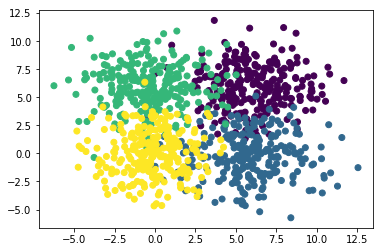

Long


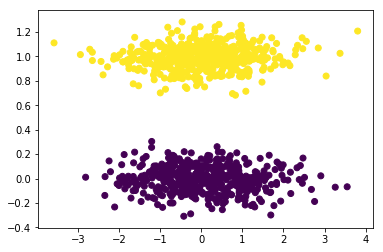

2d-10c


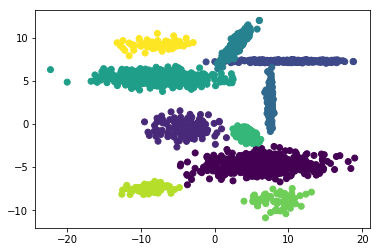

Smile


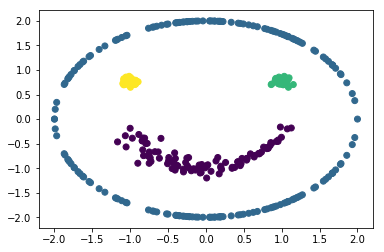

Order2-3clust


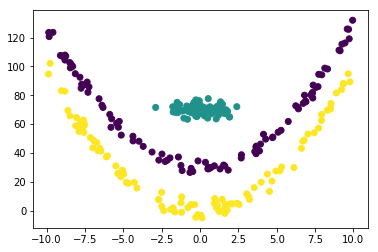

Iris


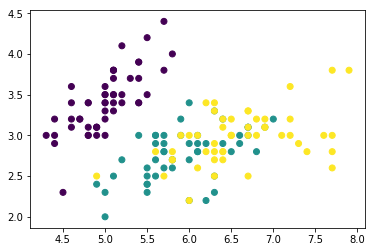

In [162]:
print('Real Clusters')
for data in datasets:
    print(data[1])
    plotData(data[0])

In [119]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.mixture import GaussianMixture


def singleLink(data):
    cluster = AgglomerativeClustering(n_clusters=len(set(data.label))+5, affinity='euclidean', linkage='single')
    cluster.fit_predict(data[list(data)[:-1]])
    plotDataWithError(data, cluster.labels_)
    
def completeLink(data):
    cluster = AgglomerativeClustering(n_clusters=len(set(data.label)), affinity='euclidean', linkage='complete')
    cluster.fit_predict(data[list(data)[:-1]])
    plotDataWithError(data, cluster.labels_)
    
def averageLink(data):
    cluster = AgglomerativeClustering(n_clusters=len(set(data.label)) + 1, affinity='euclidean', linkage='average')
    cluster.fit_predict(data[list(data)[:-1]])
    plotDataWithError(data, cluster.labels_)
    
def wardLink(data):
    cluster = AgglomerativeClustering(n_clusters=len(set(data.label)), affinity='euclidean', linkage='ward')
    cluster.fit_predict(data[list(data)[:-1]])
    plotDataWithError(data, cluster.labels_)

def DBScan(data):
    cluster = DBSCAN().fit(data[list(data)[:-1]])
    plotDataWithError(data, cluster.labels_)
    
def kMeans(data):
    cluster = KMeans(n_clusters=len(set(data.label))).fit(data[list(data)[:-1]])
    plotDataWithError(data, cluster.labels_)
    
def EMClust(data):
    EMLabels = GaussianMixture(n_components=len(set(data.label))).fit_predict(data[list(data)[:-1]])
    plotDataWithError(data, EMLabels)

Single Link
Square
Error 0.5000	ARI: 0.0000:


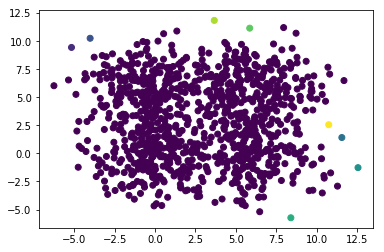

Long
Error 0.0060	ARI: 0.9880:


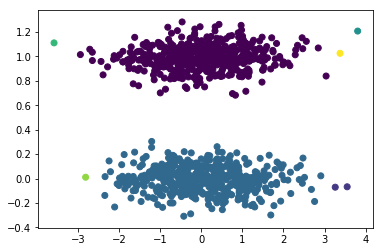

2d-10c
Error 0.3165	ARI: 0.3671:


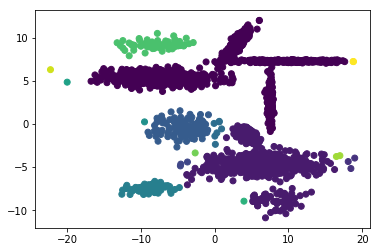

Smile
Error 0.2213	ARI: 0.5575:


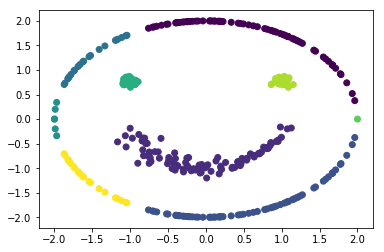

Order2-3clust
Error 0.4841	ARI: 0.0318:


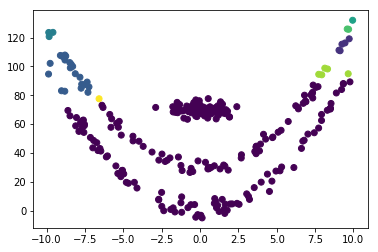

Iris
Error 0.2314	ARI: 0.5372:


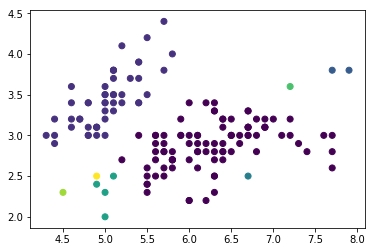

In [120]:
print('Single Link')
for data in datasets:
    print(data[1])
    singleLink(data[0])

Complete Link
Square
Error 0.2248	ARI: 0.5505:


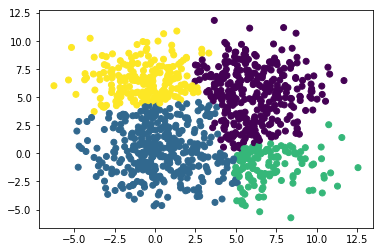

Long
Error 0.4955	ARI: 0.0091:


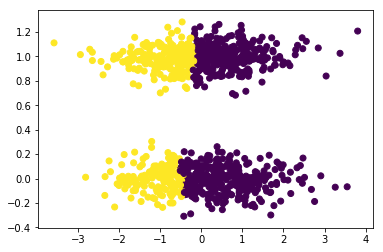

2d-10c
Error 0.2411	ARI: 0.5179:


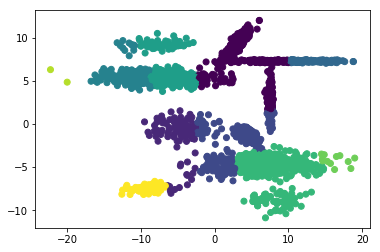

Smile
Error 0.4047	ARI: 0.1906:


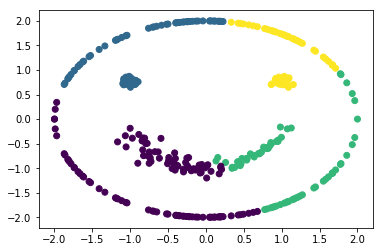

Order2-3clust
Error 0.3538	ARI: 0.2925:


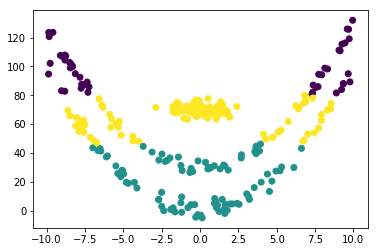

Iris
Error 0.1789	ARI: 0.6423:


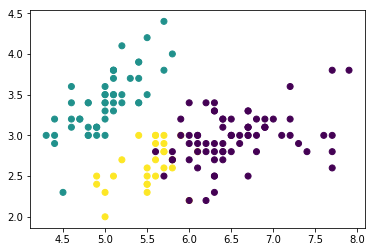

In [90]:
print('Complete Link')
for data in datasets:
    print(data[1])
    completeLink(data[0])

Average Link
Square
Error 0.1993	ARI: 0.6014:


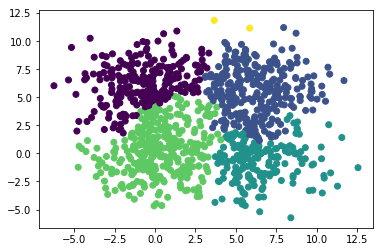

Long
Error 0.4997	ARI: 0.0007:


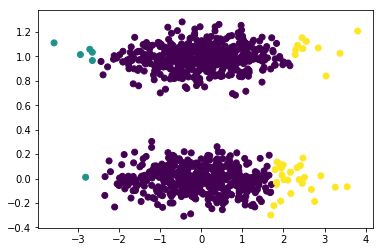

2d-10c
Error 0.2028	ARI: 0.5944:


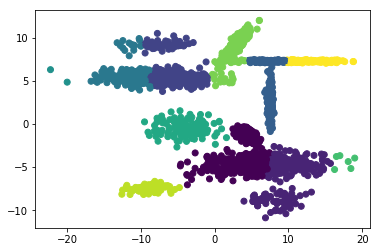

Smile
Error 0.3963	ARI: 0.2074:


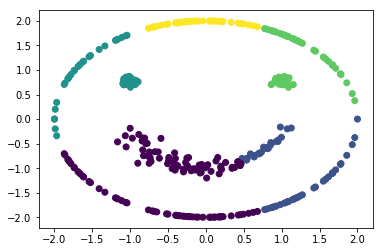

Order2-3clust
Error 0.4096	ARI: 0.1808:


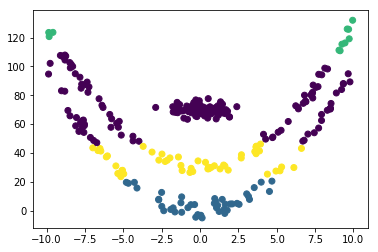

Iris
Error 0.1354	ARI: 0.7291:


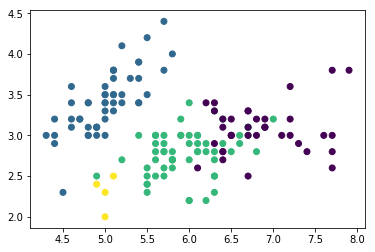

In [95]:
print('Average Link')
for data in datasets:
    print(data[1])
    averageLink(data[0])

Ward Link
Square
Error 0.2384	ARI: 0.5232:


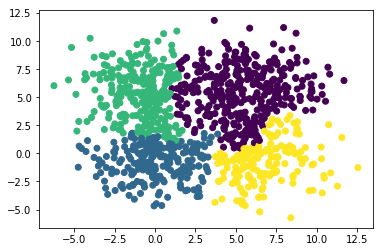

Long
Error 0.4999	ARI: 0.0002:


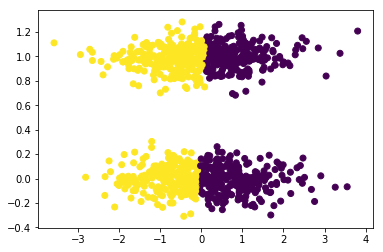

2d-10c
Error 0.1694	ARI: 0.6612:


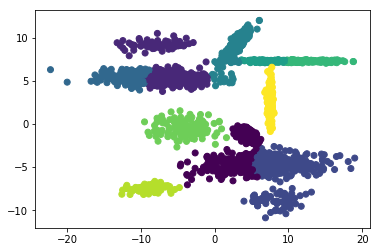

Smile
Error 0.3979	ARI: 0.2041:


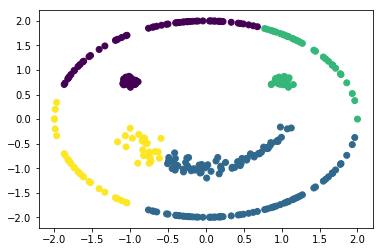

Order2-3clust
Error 0.3436	ARI: 0.3128:


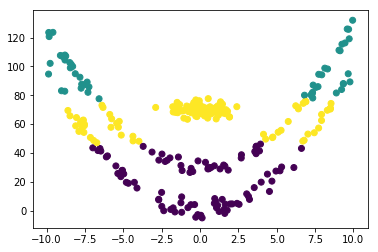

Iris
Error 0.1344	ARI: 0.7312:


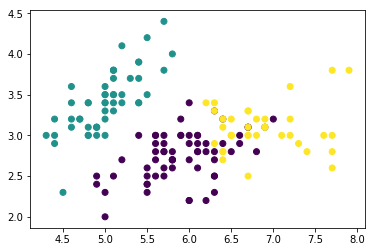

In [92]:
print('Ward Link')
for data in datasets:
    print(data[1])
    wardLink(data[0])

DBSCAN
Square
Error 0.3979	ARI: 0.2042:


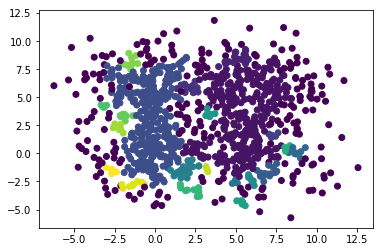

Long
Error 0.5000	ARI: 0.0000:


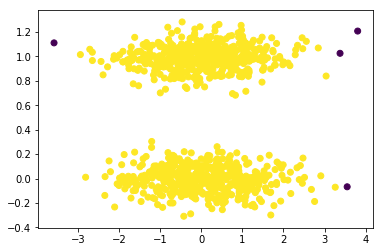

2d-10c
Error 0.0662	ARI: 0.8676:


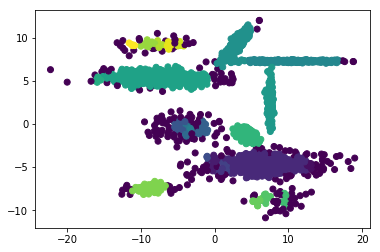

Smile
Error 0.0028	ARI: 0.9945:


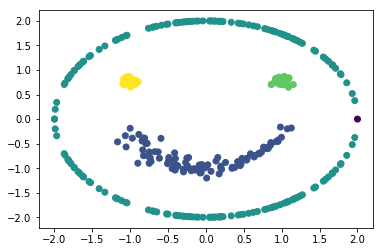

Order2-3clust
Error 0.4732	ARI: 0.0536:


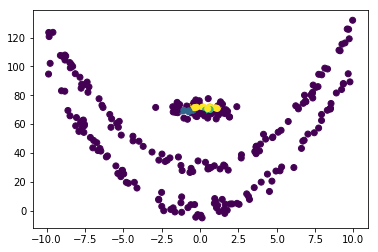

Iris
Error 0.2397	ARI: 0.5206:


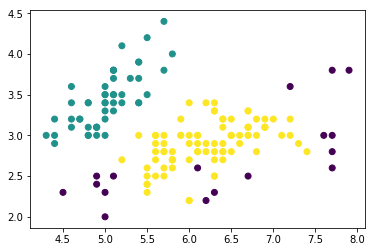

In [19]:
print('DBSCAN')
for data in datasets:
    print(data[1])
    DBScan(data[0])

K-Means
Square
Error 0.1534	ARI: 0.6932:


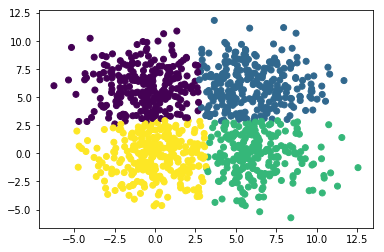

Long
Error 0.5004	ARI: -0.0008:


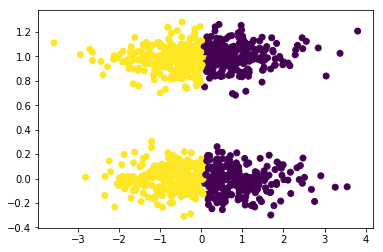

2d-10c
Error 0.1385	ARI: 0.7229:


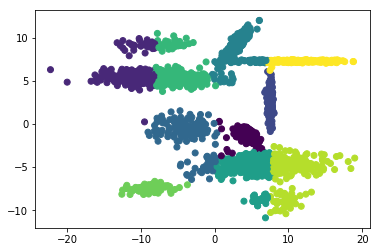

Smile
Error 0.4074	ARI: 0.1852:


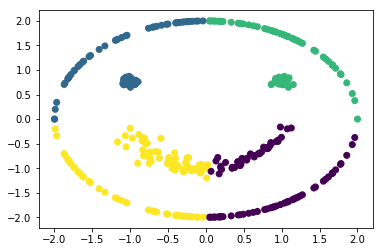

Order2-3clust
Error 0.3789	ARI: 0.2422:


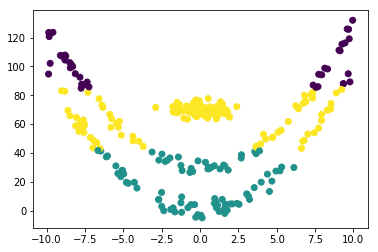

Iris
Error 0.1349	ARI: 0.7302:


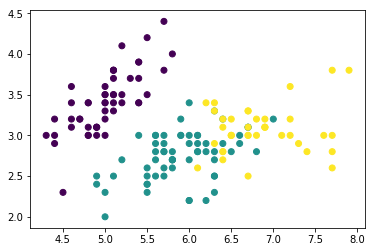

In [20]:
print('K-Means')
for data in datasets:
    print(data[1])
    kMeans(data[0])

EM Algorithm
Square
Error 0.1666	ARI: 0.6668:


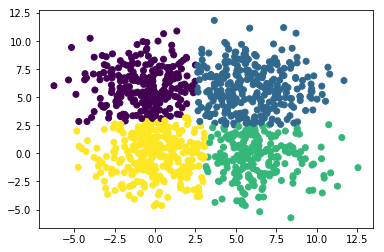

Long
Error 0.5004	ARI: -0.0008:


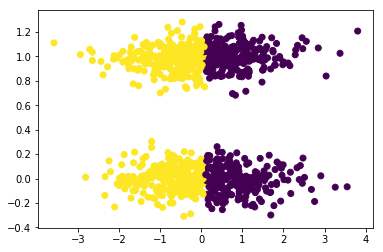

2d-10c
Error 0.1359	ARI: 0.7282:


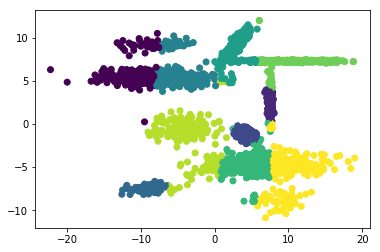

Smile
Error 0.3668	ARI: 0.2665:


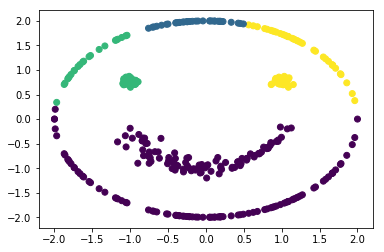

Order2-3clust
Error 0.2859	ARI: 0.4283:


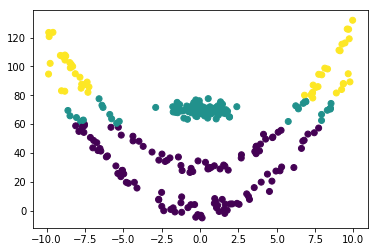

Iris
Error 0.1349	ARI: 0.7302:


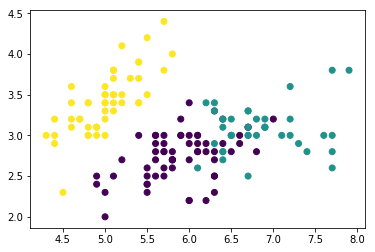

In [59]:
print('EM Algorithm')
for data in datasets:
    print(data[1])
    EMClust(data[0])

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!


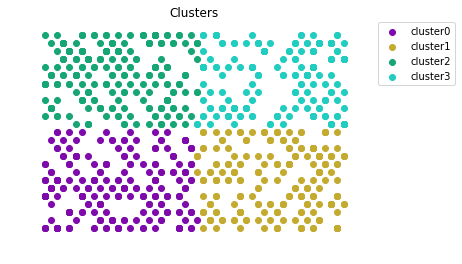

Square	Error 0.4945	ARI: 0.0109:


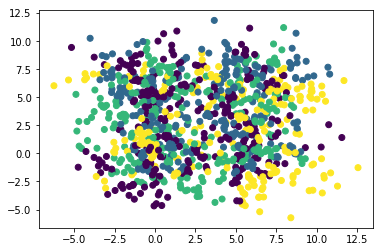

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!


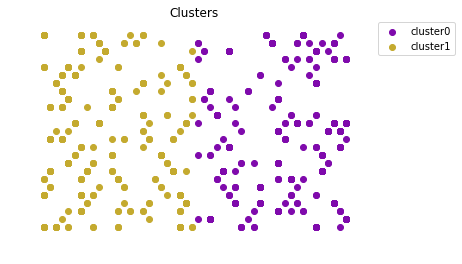

Long	Error 0.3447	ARI: 0.3107:


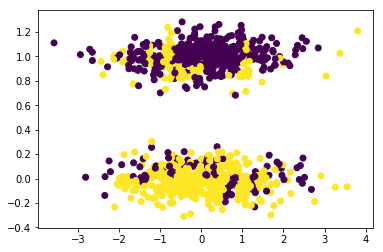

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!


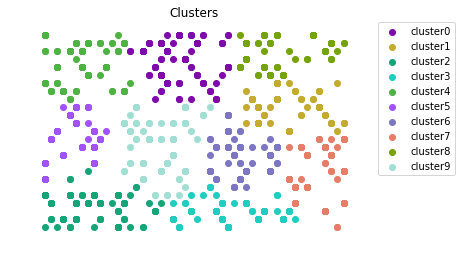

2d-10c	Error 0.4121	ARI: 0.1758:


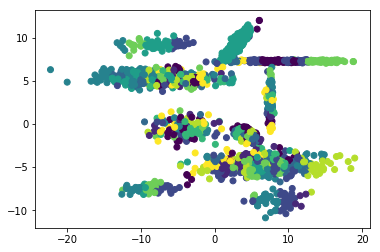

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!


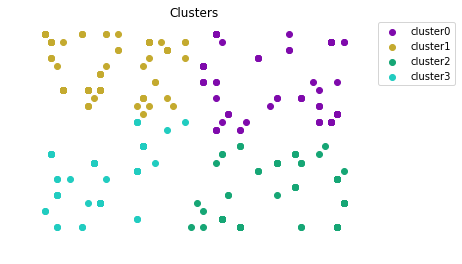

Smile	Error 0.4712	ARI: 0.0577:


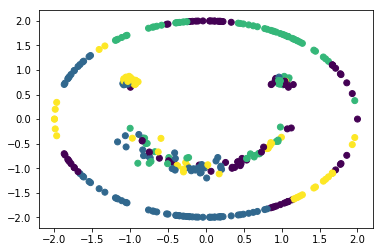

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!


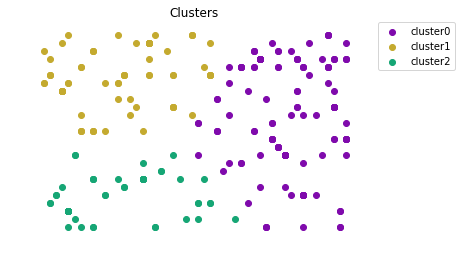

Order2-3clust	Error 0.4623	ARI: 0.0754:


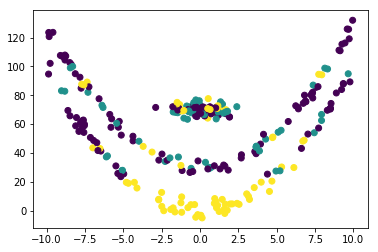

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!


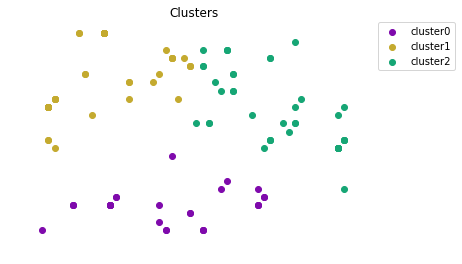

Iris	Error 0.3416	ARI: 0.3168:


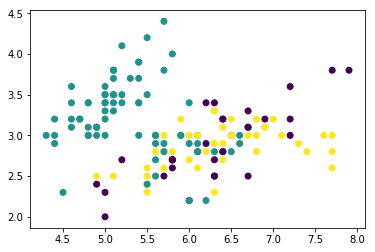

In [70]:
import SimpSOM as sps
import numpy as np

for data, dataset_name in datasets:
    perm = np.random.permutation(len(data))
    raw_data = data.values[:, :-1][perm]
    
    net = sps.somNet(25, 25, raw_data)
    net.train(0.015, 250)
    total_clusters = len(np.unique(data.label.values))
    clusters = net.cluster(
        data.values[:, :-1], type='KMeans', 
        numcl=total_clusters, show=True, savefile=False
    )
    
    labels = np.zeros(len(data))
    for cidx, cluster in enumerate(clusters):
        for idx in cluster:
            labels[idx] = cidx
    
    print(dataset_name, end="\t")
    plotDataWithError(data, labels)